In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render

from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

import math

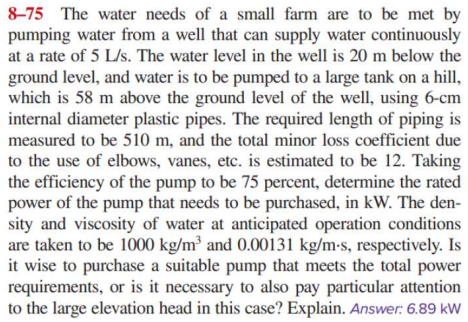

## Solution:
Given a farm that is supplied water from a well that is below ground level by pumping from the well to a large tank on a hill through plastic pipes, the rated power of the pump is to be determined.

## Assumptions:
The points of reference for the well and water tank are at the free surface of both.

In [3]:
%%render param
v_w = 5*u.l/u.s #water supply rate
z_w = 20*u.m #water level of well below ground
z_t = 58*u.m #level of tank on hill above ground
D_p = 6*u.cm #internal diameter of plastic pipes
L_p = 510*u.m #length of piping
K_lp = 12 #total minor loss coefficient
eta_p = 0.75 #efficiency of pump
rho = 1000*u.kg/u.m**3
mu_w = 0.00131*u.kg/(u.m*u.s) #viscocity
g = 9.81*u.m/u.s**2
pi = math.pi

<IPython.core.display.Latex object>

## Analysis:
Use the energy equation for a control volume between the free surfaces of the well and reservoir: $\dfrac{P_1}{\rho g} + \alpha_1 \dfrac{V_1^2}{2g} + z_1 + h_{pump,u} = \dfrac{P_2}{\rho g} + \alpha_2 \dfrac{V_2^2}{2g} + z_2 + h_{turbine,e} + h_L$

And $h_{pump} = z_2 + h_L$

In [4]:
%%render
h_pump = z_t + z_w

<IPython.core.display.Latex object>

Next find the average velocity in the pipe and Reynolds number:
\begin{equation*}
V = \dfrac{\dot{V}}{A_c} = \dfrac{\dot{V}}{\dfrac{\pi D^2}{4}} \\
Re = \dfrac{\rho V D}{\mu}
\end{equation*}

In [5]:
%%render long
V = v_w / ((pi*D_p**2)/4)
Re = (rho*V*D_p)/mu_w

<IPython.core.display.Latex object>

Since the Reynolds number is higher than 4000, the flow is turbulent and the friction factor has to be determined using the Moody chart or Colebrook equation. Using the Moody chart the friction factor is 0.018

In [6]:
%%render
f = 0.018 #friction factor

<IPython.core.display.Latex object>

Head loss is found with the equation $h_L = h_{L,total} = h_{L,major} + h_{L,minor} = (f\dfrac{L}{D} + \Sigma K_L)\dfrac{V_2^2}{2g}$

In [7]:
%%render long
h_L = (f*(L_p/D_p) + K_lp)*(V**2/(2*g))
h_pumpu = h_pump + h_L

<IPython.core.display.Latex object>

Next find the required pumping power with the equation: $\dot{W}_{pump} = \dfrac{\dot{V}\rho g h_{pump,u}}{\eta_{pump}}$

In [9]:
%%render long
W_pump = (v_w*rho*g*h_pumpu)/eta_p

<IPython.core.display.Latex object>

In [10]:
print(W_pump.to('kW'))

6.821158364298946 kilowatt


## Discussion:
By using the energy equation, we are able to find the useful pump head needed to find the rated power of the pump at 6.8 kW.